# Kaggle Learn: Introduction to Machine Learning

For most of this learning we will be looking at trying to predict house prices. This is done using a snapshot from the [Iowa Housing Dataset](https://www.kaggle.com/datasets/dansbecker/home-data-for-ml-course), found in `Assets/iowa_data.csv`. We will use the scikit-learn library to create our models. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

## Table Of Contents

* **0.** [Dependancies and Settings](#0-Dependancies-and-Settings)  
* **1.** [Useful Links](#1-Useful-Links)  
* **2.** [How Models Work](#2-How-Models-Work)  
* **3.** [Basic Data Exploration](#3-Basic-Data-Exploration)  
* **4.** [Simple Model Building](#4-Simple-Model-Building)  
  * **4.1.** [Data Selection](#4.1-Data-Selection)  
  * **4.2.** [Model Fitting and Predicting](#4.2-Model-Fitting-and-Predicting)  
* **5.** [Model Validation](#5-Model-Validation)  
  * **5.1.** [Testing / Validation Data](#5.1-Testing-/-Validation-Data)  
* **6.** [Underfitting and Overfitting](#6-Underfitting-and-Overfitting)  
  * **6.1.** [Finding optimal parameters](#6.1-Finding-optimal-parameters)  
* **7.** [Random Forests](#7-Random-Forests)  
* **8.** [Putting it all together](#8-Putting-it-all-together)  

## 0 Dependancies and Settings

Installation:

In [1]:
# Installing or upgrading
# Note: might have to restart kernel

# Uncomment:
# import sys

# Installing:
# !{sys.executable} -m pip install scikit-learn
# Upgrading:
# !{sys.executable} -m pip install --upgrade scipy==1.9.0 --user

Imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [3]:
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sklearn.__version__)

pandas version: 1.5.2
numpy version: 1.23.0
scikit-learn version: 1.2.0


Set the plotting style:

In [4]:
try:
    scientific_style = [
        '../../Random/PythonTutorialsForDataScience/data/science.mplstyle', 
        '../../Random/PythonTutorialsForDataScience/data/notebook.mplstyle', 
        '../../Random/PythonTutorialsForDataScience/data/grid.mplstyle'
    ]

    plt.style.use(scientific_style)
    
    print('Using Scientific Style.')
except:
    print('Missing Scientific Style, continuing with default.')

Using Scientific Style.


Define the filepath where most of the data resides:

In [5]:
path = r'C:\Users\seani\Documents\JupyterNotebooks\Kaggle\KaggleLearn\Assets'

Function used to get names of files in a directory:

In [6]:
import os

def get_files(path):
    '''
    Inputs: a path string
    Returns: a list of names of files in a directory
    '''
    
    files = []
    # search through each item in the directory
    for file in os.listdir(path):
        # check it is a file
        if os.path.isfile(os.path.join(path, file)):
            files.append(file)
    
    return files

The seed used throughout for reproducable randomness:

In [7]:
seed = 1

## 1 Useful Links

- scikit-learn docs: https://scikit-learn.org/stable/modules/classes.html
- Melbourne Housing snapshot: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
- Iowa Housing dataset: https://www.kaggle.com/datasets/dansbecker/home-data-for-ml-course

## 2 How Models Work

If you were to speak to a person who had been eyeing the housing market for some time, and you asked them how they predict the prices in the future, they would likely say it's simply intuition. However, they might reveal that they have identified price patterns from houses they have seen in the past, and uses these patterns to make predictions for the future. Machine Learning aims to do the same thing.

We will start with a model called a **Decision Tree**. This is a relatively simple model, and much fancier (and more accurate) models exist. A Decision Tree simply takes an input and asks a question about that input, then follows a given **branch** depending on the answer. For example, a simple Decision Tree would be as follows:

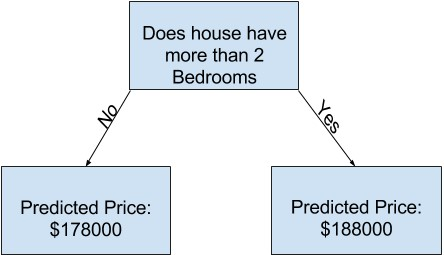

*Figure 1: A simple Decision Tree. The Question asked (box above) has two answers (left and right, No and Yes). This leads to two different predicted prices (different branches) depending on the answer.*

In Figure 1, we take in our dataset and ask whether the house has more than 2 bedrooms. Depending whether the answer is yes or no, we move to a given branch. These branches then lead us to a predicted price for that house. Typically, this predicted price is the historical average price of houses in the same category, but can be determined differently (for example, weighted by time). This step of capturing patterns from data is called **fitting** or **training** the model. The data used to fit the model is called the **training data**.

You can capture more factors using a tree that has more *splits*. These are called *deeper* trees. A decision tree that also considers the total size of each house's lot might look like this:

###### Figure 2

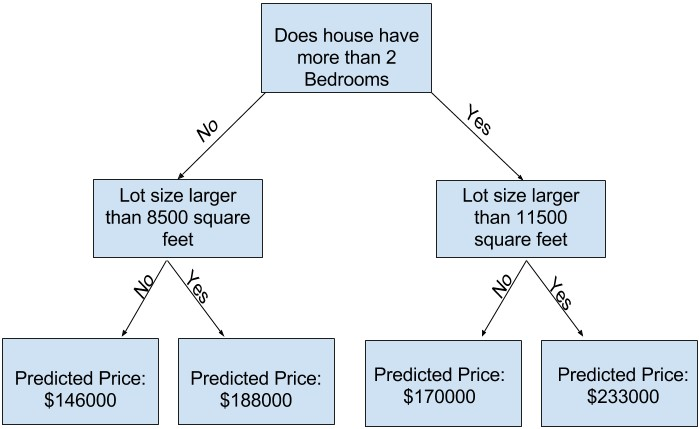

*Figure 2: A more complex Decision Tree. It has one more **layer**, and so another factor is included. The data is checked whether it meets certain lot sizes depending on the branch it took, and then another branch is taken to give the precicted price, at a **leaf**.*

## 3 Basic Data Exploration

In this section we will go through basic data exploration and manipulation using `pandas`. We will be working with the data from `Assets/iowa_data.csv`, but similar analysis can be done on the Melbourne Dataset. We can import the data and see a quick summary of it in the following cell. The summary includes the size of that column (ignoring `NaN` rows), mean, standard deviation, minimum, percentiles (`25%` is a number bigger than $25\%$ but smaller than $75\%$ of values), and maximum.

In [8]:
# Path of the file to read
iowa_file_path = 'Assets/iowa_data.csv'

# read the file
home_data = pd.read_csv(iowa_file_path)

# print a summary of the data
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The dataset itself looks like the following:

In [9]:
home_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We can find out some details of this dataset pretty quickly, for example:

In [10]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = home_data.describe()['LotArea']['mean'].round()
print(f'> Average lot area: {avg_lot_size}')

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 2022 - home_data.describe()['YearBuilt']['max']
print(f'> Newest home age in years: {newest_home_age}')

> Average lot area: 10517.0
> Newest home age in years: 12.0


## 4 Simple Model Building

### 4.1 Data Selection

Since we want to predict prices, the column we want to predict is the `SalePrice`. This is called the **prediction target**, and is usually denoted with a `y`:

In [11]:
y = home_data.SalePrice
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

As we saw above, there are a lot of **variables** (columns) we can take into account when constructing our model. Some of this data might not actually be useful, as certain variables will not actually affect the housing price (this is common, we need to comb through our data to discern what is useful and what isn't). In the future we will explore methods to automatically prioritise certain variables, but for now, we will use intuition and manual selection (only selecting a small number for simplicity).

To choose which to prioritise, we first want to look at each column:

In [12]:
# print the list of columns in the dataset to find the name of the prediction target
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We can select a few above manually, it is obvious that the `LotArea` and the `YearBuilt` and more parameters will affect the price. The columns / variables we select - that are used to make predictions - are called **features**. We then select the data containing these columns, the **training data**, often denoted by an `X`:

In [13]:
# Create the list of features below
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]

# print description or statistics from X
print('Description:')
display(X.describe())

# print the top few lines
print('Head:')
display(X.head())

Description:


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


Head:


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


### 4.2 Model Fitting and Predicting

The steps to building and using a model are:

- **Define:** What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- **Fit:** Capture patterns from provided data. This is the heart of modeling.
- **Predict:** Just what it sounds like
- **Evaluate:** Determine how accurate the model's predictions are.

We will create a Decision Tree model with scikit-learn. In particular, we will use a `DecisionTreeRegressor`. To get reproducable results, we will use the above defined `seed`. We can define, fit, and predict in the following:

In [14]:
from sklearn.tree import DecisionTreeRegressor

#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=seed)

# Fit the model
iowa_model.fit(X, y)

# create a prediction on our training data (not typically advised, see next section)
predictions = iowa_model.predict(X)
print('The predicted values:')
display(predictions)

The predicted values:


array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

Since we tried to predict the training data we get the same values, this is not good practice (leads to **overfitting**):

In [15]:
# look at our predictions
print('The predicted data:')
print(predictions[:5])

# look at the actual data
print('The actual data:')
print(y.to_numpy(dtype='float64')[:5])

The predicted data:
[208500. 181500. 223500. 140000. 250000.]
The actual data:
[208500. 181500. 223500. 140000. 250000.]


## 5 Model Validation

So now we have built a model, but how good is it? How do we determine the quality of our model?

In most applications, we determine the quality by comparing the models predictive accuracy (whether its predictions are accurate to reality). We measure our predictive accuracy using the **testing data**, **NOT** the training data. This is because the model can just "read off" the answers, per say.

There are many ways to summarise model quality, we will look at **Mean Absolute Error** (MAE). Let's take it piece by piece, the error is given by:

$$ \mathrm{error} = \mathrm{actual} - \mathrm{predicted} $$

For example: if the predicted price is $\$100$, and the actual price is $\$127$, the error is: $\$127 - \$100 = \$27$. The absolute value of this is taken so that all values are positive, and the average of these absolute errors is then calculated. Thus our measure of model quality can be said in plain English:

> On average, our predictions are off by about $\mathrm{MAE}$

We use the `mean_absolute_error` function from `sklearn.metrics` in order to do so. We can use the model created above to demonstrate this. 

*Note: For demonstration purposes, we are using the training data here to measure the MAE, as stated before, this is incorrect in practical use.*

In [16]:
from sklearn.metrics import mean_absolute_error

# use the actual values (y) and the predicted values (predictions) found earlier
mean_absolute_error(y, predictions)

62.35433789954339

### 5.1 Testing / Validation Data

To demonstrate why we need testing data (**validation data**), consider the below example:

>Imagine that, in the large real estate market, *door color is unrelated to home price*.
>
>However, in the *sample of data* you used to build the model, *all homes with green doors happened to be very expensive*. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.
>
>Since this pattern was derived from the training data, the model will appear accurate in the training data. However, this is *not true in reality*, so the model will *perform poorly on new data it hasn't seen before*.

So a commonly used method is to split the available training data into two parts; one part is for training, the other is for testing (validating). We use the `train_test_split` function from `sklearn.model_selection` in order to do so. This splits the training data ($X$) and the prediction targets ($y$) into two parts, the size of which determined by a random number generator (which we apply the `seed` to):

In [17]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# redefine our model using this training data
iowa_model = DecisionTreeRegressor(random_state=seed)

# Fit the model
iowa_model.fit(train_X, train_y)

# use the testing data for predictions
val_predictions = iowa_model.predict(val_X)
# use the testing data to get the mae
mean_absolute_error(val_y, val_predictions)

32966.449315068494

Now the $\mathrm{MAE}$ found is much higher, and more indicative of the predictive accuracy of this primitive model.

## 6 Underfitting and Overfitting

To demonstrate these phenomena, let us look at what happens when we try to expand our model. Now that we have a way to measure model accuracy, we can experiment with different parameters to find the optimal settings. From the `DecisionTreeRegressor` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), one of our available parameters to vary is the **tree depth**. This is a measure of how many splits (layers) the tree makes before coming to a prediction (leaf). [Figure 2](#Figure-2) is a tree with two layers, and is a relatively shallow tree. Each split leads to two more branches to be split (each successive layer has twice as many nodes as the previous). Thus, for a tree of $10$ layers, we have $2^{10} = 1024$ leaves.

If we have too many leaves (large tree depth), the sample data per leaf is small. This may test well in training as the model has essentially "read off" the answers again. However, as soon as new data is given, it does not know what to do with it as it has not learned any useful patterns. This is called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data.

Going the other extreme, if we make our tree very shallow, it doesn't divide up the data into very distinct groups. This is because the model fails to capture important patterns in the data since it is limited. This is called **underfitting**, where a model can perform poorly in both training and validation.

Thus, we want to find the sweet spot between underfitting and overfitting.

### 6.1 Finding optimal parameters

Let us try to optimise our $\mathrm{MAE}$ using tree depth. There are a few ways to control the tree depth of a model, but we will limit the maximum number of leaves allowed in this approach. The `max_leaf_nodes` argument allows us to do so, as this number increases, we move from underfitting to overfitting. The goal is test to many different values of this parameter to determine the optimal value for this problem.

To speed up the mean absolute error calculation, we can create a function to do so for a given value of `max_leaf_nodes`:

In [18]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=seed)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae

We can use the training and validation data found before. We will loop over many values of `max_leaf_nodes` and compare the $\mathrm{MAE}$ of each:

The lowest MAE was found to be 27280.23209035945, for an optimal max_leaf_nodes=80.


Text(0.5, 1.0, 'MAE of Validation Data for varying maximum leaves')

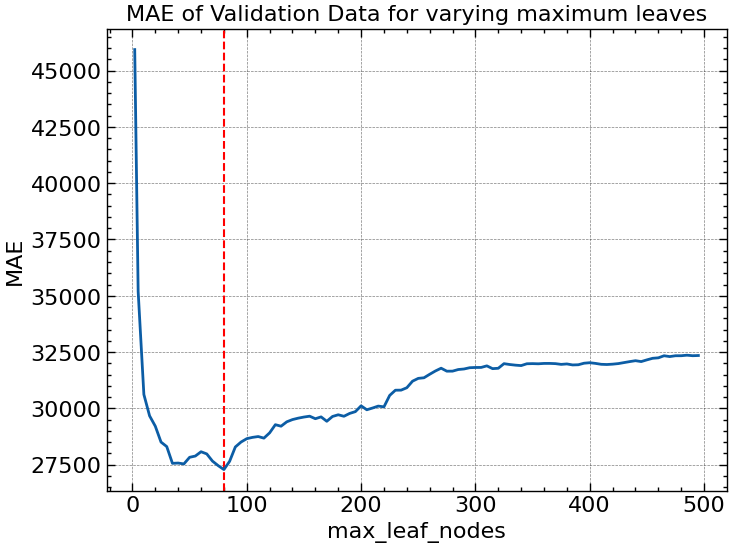

In [19]:
# get initial guess
best_leaf_nodes = 2
old = get_mae(best_leaf_nodes, train_X, val_X, train_y, val_y)

# store the nodes and mae found for plotting
leafs = [best_leaf_nodes]
maes = [old]

for max_leaf_nodes in range(5, 500, 5):
    # get new estimate of MAE
    new = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    
    # if new MAE is better than old MAE
    # update old and best estimate
    if new < old:
        old = new
        best_leaf_nodes = max_leaf_nodes
    
    # store for plotting
    leafs.append(max_leaf_nodes)
    maes.append(new)

# optimal
print(f'The lowest MAE was found to be {old}, for an optimal max_leaf_nodes={best_leaf_nodes}.')

# plotting
plt.axvline(best_leaf_nodes, color='r', ls='--', lw=1.5)
plt.plot(leafs, maes)
plt.xlabel('max_leaf_nodes')
plt.ylabel('MAE')
plt.title('MAE of Validation Data for varying maximum leaves')

To the left of the above figure, we have underfitting. To the right, overfitting. The red dotted line is the minimum $\mathrm{MAE}$.

In summary:

- **Overfitting:** capturing irrelevant patterns that won't recur in the future.
- **Underfitting:** failing to capture relevant patterns.

## 7 Random Forests

Let us look at another model type. The **random forest** uses many trees, and makes a prediction by averaging the prediction of each of its components trees. This allows random forests to correct for decision trees' habit of overfitting to their training set.

We build one [using](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) the `RandomForestRegressor` from `sklearn.ensemble`, in a similar way to the `DecisionTreeRegressor`:

In [20]:
from sklearn.ensemble import RandomForestRegressor

# create random forest
forest_model = RandomForestRegressor(random_state=1)

# fit model
forest_model.fit(train_X, train_y)

# get predictions
forest_preds = forest_model.predict(val_X)

# get mae
mean_absolute_error(val_y, forest_preds)

23009.206570906717

We can see that already, it outperforms our best Decision Tree so far. Of course, there are better models to use and further improvement on this model can be done by varying parameters.

## 8 Putting it all together

Using what we have learned, let us now try to optimise a model to predict the housing prices on a test dataset. The training will still be performed using `Assets\iowa_data.csv`, however testing will be done using `Assets\housingprices_test.csv`. This data can be found in the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/competitions/home-data-for-ml-course/data). We will then prepare the predictions to be able to be submitted to this competition.

We will look to find the optimal number of trees `n_estimators` and the optimal max number of leaves `max_leaf_nodes` to use for our random forest:

*Note: This can be made much faster using many different methods, this works though.*

In [21]:
# training and testing data for optimal checking
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# function to get mae for changing n_estimators and max_leaf_nodes
def get_mae(n_estimators, max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=seed)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae

# get initial guess
best_leaf_nodes = 50
best_estimators = 50
old = get_mae(best_estimators, best_leaf_nodes, train_X, val_X, train_y, val_y)

# get optimal n_estimators first
for n_estimators in range(50, 250, 5):
    # get new estimate of MAE
    new = get_mae(n_estimators, best_leaf_nodes, train_X, val_X, train_y, val_y)
    
    # if new MAE is better than old MAE
    # update old and best estimate
    if new < old:
        old = new
        best_estimators = n_estimators

# now optimal max_leaf_nodes
for max_leaf_nodes in range(50, 250, 5):
    # get new estimate of MAE
    new = get_mae(best_estimators, max_leaf_nodes, train_X, val_X, train_y, val_y)
    
    # if new MAE is better than old MAE
    # update old and best estimate
    if new < old:
        old = new
        best_leaf_nodes = max_leaf_nodes

# so now get the optimal mae using both
old = get_mae(best_estimators, best_leaf_nodes, train_X, val_X, train_y, val_y)

# optimal
print(f'The lowest MAE was found to be {old}, for an optimal n_estimators={best_estimators} and max_leaf_nodes={best_leaf_nodes}.')

The lowest MAE was found to be 22549.67837062073, for an optimal n_estimators=240 and max_leaf_nodes=75.


Since we have testing data set aside already, we will train on the full set of training data using our optimal parameters, then test:

In [22]:
# create training data
train_X, train_y = X, y  # already defined

# create testing data
test_data = pd.read_csv('Assets/housingprices_test.csv')
val_X = test_data[feature_names]

# create model
model = RandomForestRegressor(n_estimators=best_estimators, max_leaf_nodes=best_leaf_nodes, random_state=seed)

# fit model
model.fit(train_X, train_y)

# get predictions from testing data
preds_val = model.predict(val_X)
preds_val

array([126944.85867157, 157133.4534853 , 180149.70249381, ...,
       157427.12202283, 143536.26744617, 232892.9902494 ])

Now we save this into a format that can be submitted to the [competition](https://www.kaggle.com/competitions/home-data-for-ml-course):

In [23]:
# create dataframe of the predicted values
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': preds_val})

# send to csv (uncomment below line)
#output.to_csv('submission_IntroToML.csv', index=False)

output

,Id,SalePrice
0,1461,126944.858672
1,1462,157133.453485
2,1463,180149.702494
3,1464,180119.553545
4,1465,188188.262191
...,...,...
1454,2915,97611.571509
1455,2916,97705.381613
1456,2917,157427.122023
1457,2918,143536.267446


When submitted, this achieved a score of $21554.755$, let's see if we can improve this in the Intermediate ML notebook.